<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Bayesian" data-toc-modified-id="Bayesian-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian</a></span><ul class="toc-item"><li><span><a href="#Single-groupby-(categorical)" data-toc-modified-id="Single-groupby-(categorical)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Single groupby (categorical)</a></span></li><li><span><a href="#Single-groupby-(ordinal)" data-toc-modified-id="Single-groupby-(ordinal)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Single groupby (ordinal)</a></span></li><li><span><a href="#Multiple-groupby-(categorical)" data-toc-modified-id="Multiple-groupby-(categorical)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multiple groupby (categorical)</a></span></li><li><span><a href="#Multiple-groupby-(ordinal-+-categorical)" data-toc-modified-id="Multiple-groupby-(ordinal-+-categorical)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Multiple groupby (ordinal + categorical)</a></span></li><li><span><a href="#Ordinal-+-2-categorical" data-toc-modified-id="Ordinal-+-2-categorical-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ordinal + 2 categorical</a></span></li></ul></li><li><span><a href="#Frequentist" data-toc-modified-id="Frequentist-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Frequentist</a></span><ul class="toc-item"><li><span><a href="#Single-categorical" data-toc-modified-id="Single-categorical-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single categorical</a></span></li><li><span><a href="#Multi-categorical" data-toc-modified-id="Multi-categorical-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multi categorical</a></span></li></ul></li><li><span><a href="#Ordinal-+-Categorical" data-toc-modified-id="Ordinal-+-Categorical-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ordinal + Categorical</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd

In [2]:
import confidence
confidence.options.set_option('randomization_seed', 1)

Loading BokehJS ...

/Users/chalpert/repos/confidence/confidence/__init__.py:19: FutureWarning: 

	Beta version. Confidence is still under development!
	Expect bugs and possible backwards-incompatible changes in the future.
	
  _warn(_beta_warning, FutureWarning)


# Bayesian

## Single groupby (categorical)

In [3]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2'],
                   'success': [50, 4, 10],
                   'total': [100, 10, 15],
                   'other unused column': [1, 1, 1]})
df.head()

other unused column  success  total variation_name
0                    1       50    100           test
1                    1        4     10        control
2                    1       10     15          test2

In [4]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns='variation_name')

In [5]:
test.summary()

variation_name  success  total  probability  probability_ci_lower  \
0           test       50    100     0.500000              0.403174   
1        control        4     10     0.400000              0.153067   
2          test2       10     15     0.666667              0.415836   

   probability_ci_upper  
0              0.596826  
1              0.696321  
2              0.859747

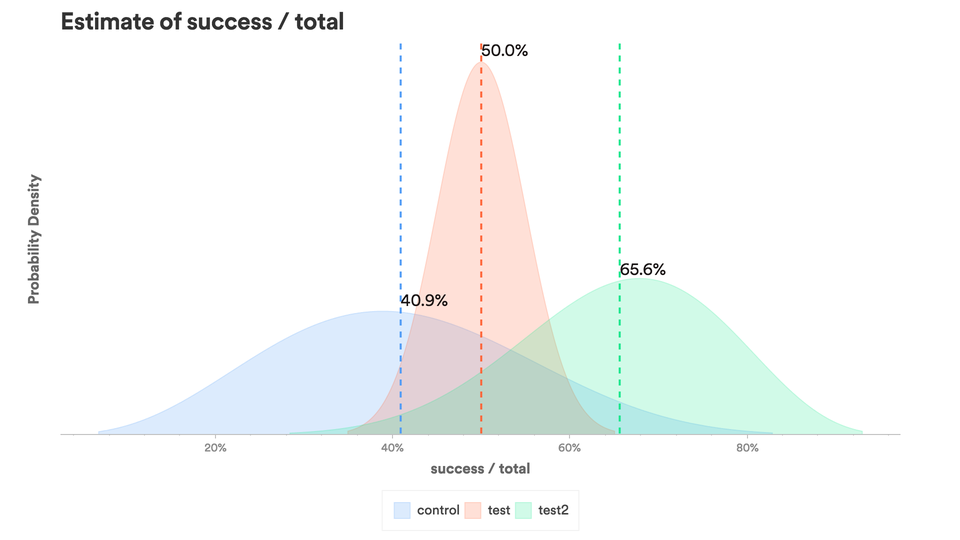

In [6]:
test.summary_plot().show('png')

In [7]:
test.difference('control', 'test')

level_1 level_2  absolute_difference  difference  ci_lower  ci_upper  \
0  control    test                 True    0.091138 -0.212183  0.366671   

   P(test > control)  control potential loss  control potential gain  \
0           0.725982               -0.117625                0.026487   

   test potential loss  test potential gain  
0            -0.026487             0.117625

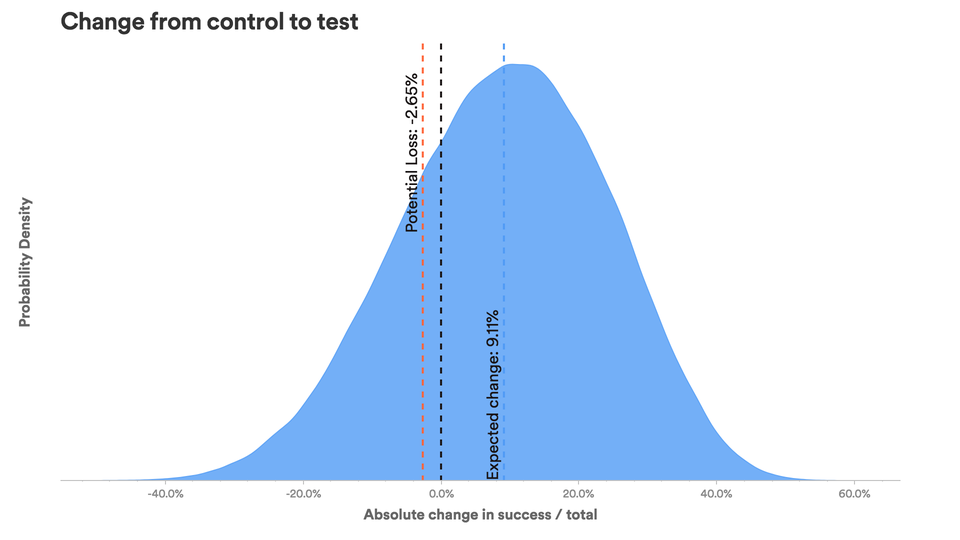

In [8]:
test.difference_plot('control', 'test').show('png')

In [9]:
test.multiple_difference('test')

level  absolute_difference  difference  ci_lower  ci_upper  P(test >= all)  \
0  test                 True   -0.164789 -0.384446   0.07486        0.088166   

   test potential loss  test potential gain  
0            -0.186211              0.05676

## Single groupby (ordinal)

In [10]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',],
                   'success': [500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,],
                   'total': [1010, 22, 150,
                             1000, 20, 153,
                             1030, 23, 154,
                             1000, 20, 150,
                             1040, 21, 155,],
                   'date': ['2018-01-01', '2018-01-01', '2018-01-01',
                            '2018-01-02', '2018-01-02', '2018-01-02',
                            '2018-01-03', '2018-01-03', '2018-01-03',
                            '2018-01-04', '2018-01-04', '2018-01-04', 
                            '2018-01-05', '2018-01-05', '2018-01-05',]})
# Cast to datetime
df['date'] = pd.to_datetime(df['date'])
# Filter to only the test variation
df = df[df['variation_name'] == 'test']
df.head()

date  success  total variation_name
0  2018-01-01      500   1010           test
3  2018-01-02      510   1000           test
6  2018-01-03      520   1030           test
9  2018-01-04      530   1000           test
12 2018-01-05      530   1040           test

In [11]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               ordinal_group_column='date')

In [12]:
test.summary()

date  success  total  probability  probability_ci_lower  \
0  2018-01-01      500   1010     0.495050              0.464266   
3  2018-01-02      510   1000     0.510000              0.479025   
6  2018-01-03      520   1030     0.504854              0.474343   
9  2018-01-04      530   1000     0.530000              0.499017   
12 2018-01-05      530   1040     0.509615              0.479242   

    probability_ci_upper  
0               0.525861  
3               0.540917  
6               0.535339  
9               0.560810  
12              0.539936

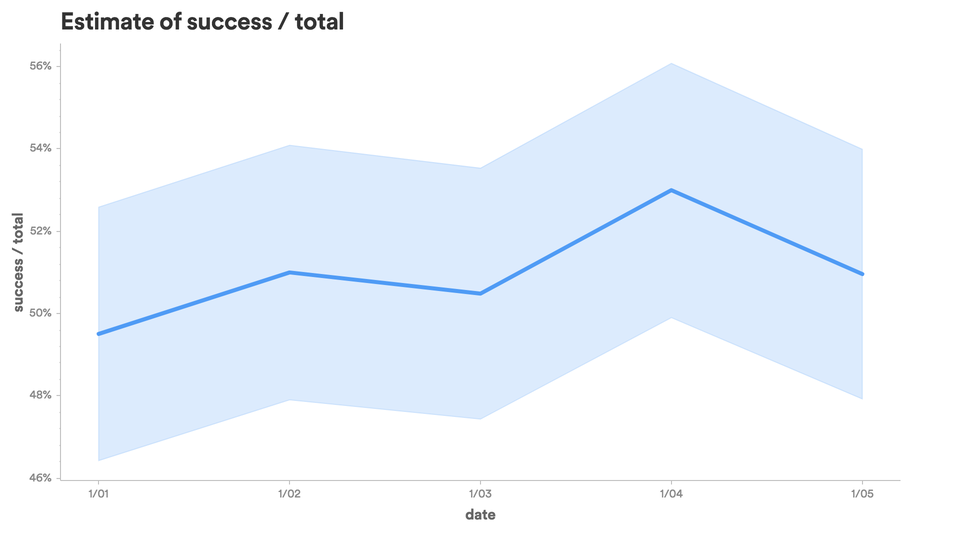

In [13]:
test.summary_plot().show('png')

In [14]:
test.difference(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-01-02'))

level_1              level_2  absolute_difference  difference  \
0  2018-01-01 00:00:00  2018-01-02 00:00:00                 True    0.014952   

   ci_lower  ci_upper  P(2018-01-02 00:00:00 > 2018-01-01 00:00:00)  \
0  -0.02871  0.058591                                       0.74851   

   2018-01-01 00:00:00 potential loss  2018-01-01 00:00:00 potential gain  \
0                           -0.018302                             0.00335   

   2018-01-02 00:00:00 potential loss  2018-01-02 00:00:00 potential gain  
0                            -0.00335                            0.018302

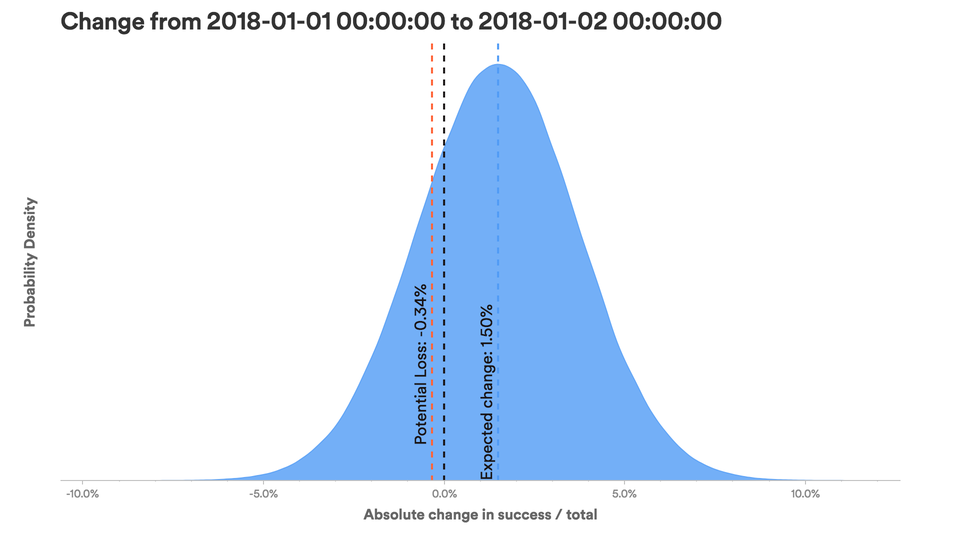

In [15]:
test.difference_plot(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-01-02')).show('png')

## Multiple groupby (categorical)

In [16]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2', 'test','control', 'test2'],
                   'success': [500, 42, 1005, 50, 4, 100],
                   'total': [1009, 104, 1502, 100, 10, 150],
                   'country': ['us','us','us','gb','gb','gb',
                ]})
df.head()

country  success  total variation_name
0      us      500   1009           test
1      us       42    104        control
2      us     1005   1502          test2
3      gb       50    100           test
4      gb        4     10        control

In [17]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns=['variation_name', 'country'])

In [18]:
test.summary()

variation_name country  success  total  probability  probability_ci_lower  \
0           test      us      500   1009     0.495540              0.464740   
1        control      us       42    104     0.403846              0.313242   
2          test2      us     1005   1502     0.669108              0.645004   
3           test      gb       50    100     0.500000              0.403174   
4        control      gb        4     10     0.400000              0.153067   
5          test2      gb      100    150     0.666667              0.588610   

   probability_ci_upper  
0              0.526366  
1              0.499720  
2              0.692561  
3              0.596826  
4              0.696321  
5              0.738361

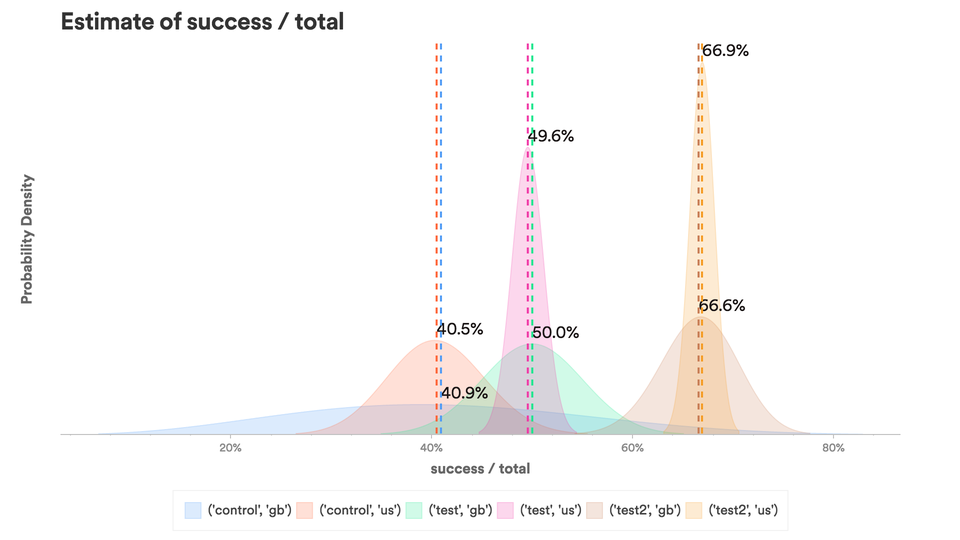

In [19]:
test.summary_plot().show('png')

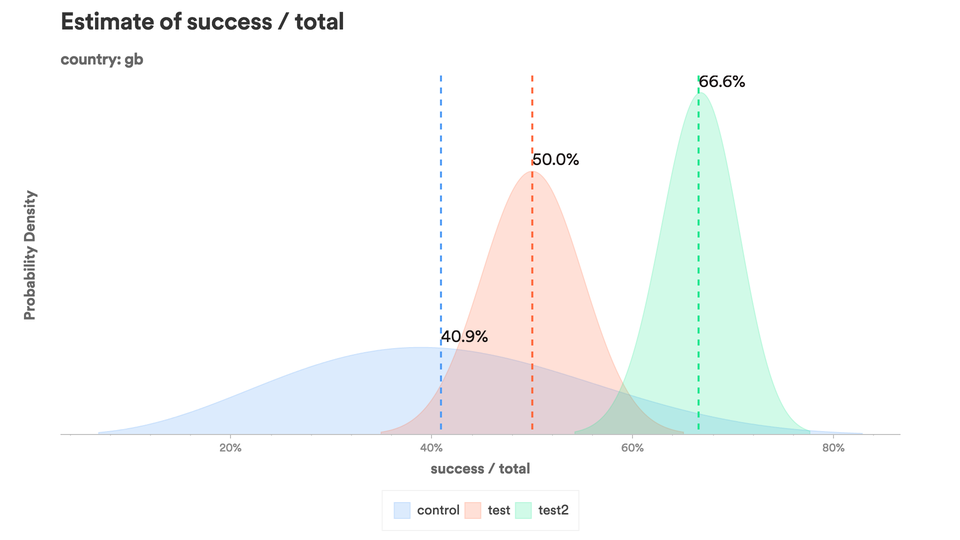

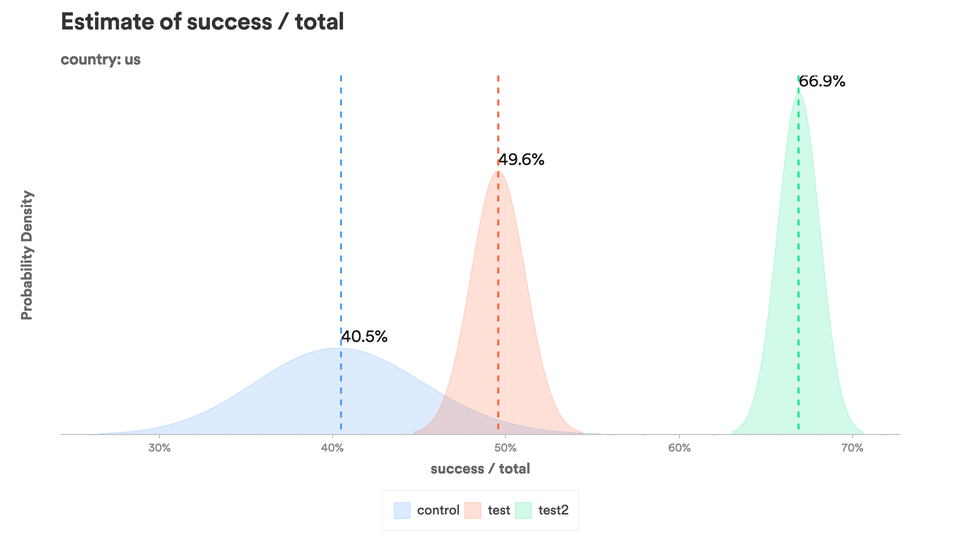

In [20]:
test.summary_plot(groupby='country').show('png')

In [21]:
test.difference(('control', 'gb'), ('test', 'gb'))

level_1         level_2  absolute_difference  difference  \
0  ('control', 'gb')  ('test', 'gb')                 True    0.091138   

   ci_lower  ci_upper  P(('test', 'gb') > ('control', 'gb'))  \
0 -0.212183  0.366671                               0.725982   

   ('control', 'gb') potential loss  ('control', 'gb') potential gain  \
0                         -0.117625                          0.026487   

   ('test', 'gb') potential loss  ('test', 'gb') potential gain  
0                      -0.026487                       0.117625

In [22]:
test.difference('control', 'test', groupby='country')

groupby  level_1 level_2  absolute_difference  difference  ci_lower  \
0      gb  control    test                 True    0.091138 -0.212183   
1      us  control    test                 True    0.090804 -0.008836   

   ci_upper  P(test > control)  control potential loss  \
0  0.366671           0.725982               -0.117625   
1  0.187315           0.963228               -0.091565   

   control potential gain  test potential loss  test potential gain  
0                0.026487            -0.026487             0.117625  
1                0.000761            -0.000761             0.091565

In [23]:
test.difference('us', 'gb', groupby='variation_name')

groupby level_1 level_2  absolute_difference  difference  ci_lower  \
0  control      us      gb                 True    0.004370 -0.269541   
1     test      us      gb                 True    0.004387 -0.097180   
2    test2      us      gb                 True   -0.003355 -0.083993   

   ci_upper  P(gb > us)  us potential loss  us potential gain  \
0  0.305855    0.498462          -0.062806           0.058437   
1  0.106119    0.532806          -0.023067           0.018680   
2  0.073654    0.473716          -0.014416           0.017771   

   gb potential loss  gb potential gain  
0          -0.058437           0.062806  
1          -0.018680           0.023067  
2          -0.017771           0.014416

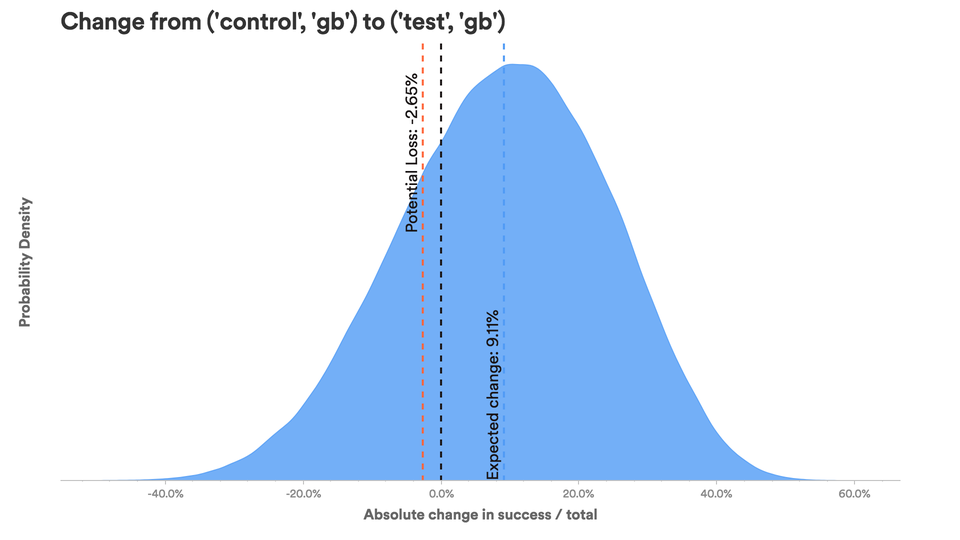

In [24]:
test.difference_plot(('control', 'gb'), ('test', 'gb')).show('png')

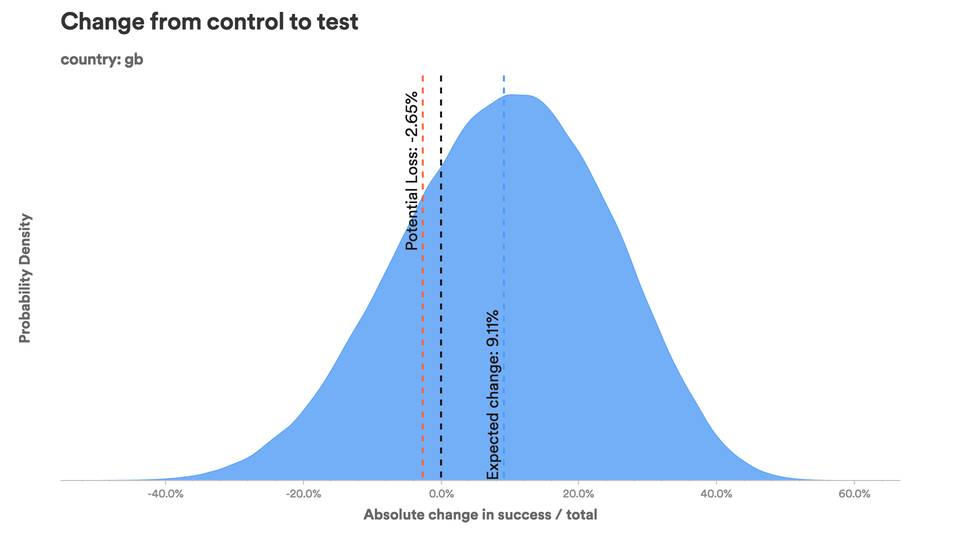

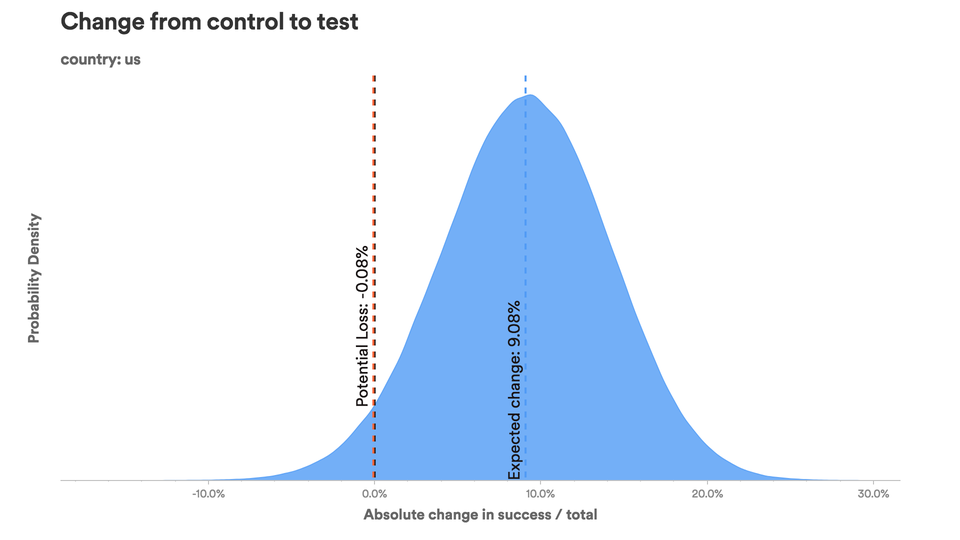

In [25]:
test.difference_plot('control', 'test', groupby='country').show('png')

## Multiple groupby (ordinal + categorical)

In [26]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',],
                   'success': [500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,],
                   'total': [1010, 22, 150,
                             1000, 20, 153,
                             1030, 23, 154,
                             1000, 20, 150,
                             1040, 21, 155,],
                   'days_since_reg': [1, 1, 1,
                                      2, 2, 2,
                                      3, 3, 3,
                                      4, 4, 4,
                                      5, 5, 5],})
df.head()

days_since_reg  success  total variation_name
0               1      500   1010           test
1               1        8     22        control
2               1      100    150          test2
3               2      510   1000           test
4               2        8     20        control

In [27]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns='variation_name',
                               ordinal_group_column='days_since_reg')

In [28]:
test.summary()

variation_name  days_since_reg  success  total  probability  \
0            test               1      500   1010     0.495050   
1         control               1        8     22     0.363636   
2           test2               1      100    150     0.666667   
3            test               2      510   1000     0.510000   
4         control               2        8     20     0.400000   
5           test2               2      100    153     0.653595   
6            test               3      520   1030     0.504854   
7         control               3        9     23     0.391304   
8           test2               3      104    154     0.675325   
9            test               4      530   1000     0.530000   
10        control               4        7     20     0.350000   
11          test2               4      100    150     0.666667   
12           test               5      530   1040     0.509615   
13        control               5        8     21     0.380952   
14          test2               5      103    155     0.664516   

    probability_ci_lower  probability_ci_upper  
0               0.464266              0.525861  
1               0.189323              0.571290  
2               0.588610              0.738361  
3               0.479025              0.540917  
4               0.210629              0.616080  
5               0.575883              0.725557  
6               0.474343              0.535339  
7               0.214311              0.593805  
8               0.598643              0.745486  
9               0.499017              0.560810  
10              0.172276              0.567766  
11              0.588610              0.738361  
12              0.479242              0.539936  
13              0.199402              0.592895  
14              0.587684              0.735269

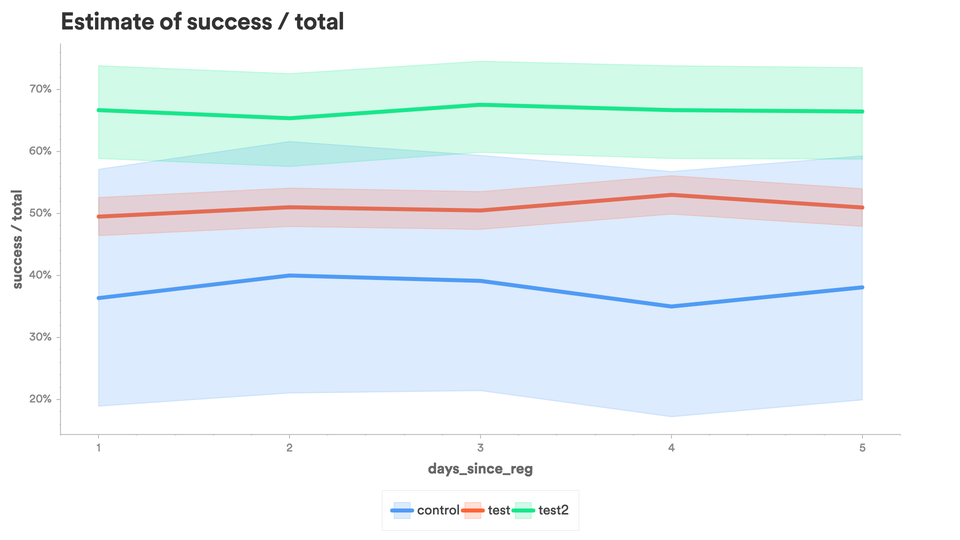

In [29]:
test.summary_plot().show('png')

In [30]:
test.difference(('control', 1), ('test', 1))

level_1      level_2  absolute_difference  difference  ci_lower  \
0  ('control', 1)  ('test', 1)                 True    0.125497 -0.078808   

   ci_upper  P(('test', 1) > ('control', 1))  ('control', 1) potential loss  \
0  0.308101                         0.889504                      -0.131163   

   ('control', 1) potential gain  ('test', 1) potential loss  \
0                       0.005666                   -0.005666   

   ('test', 1) potential gain  
0                    0.131163

In [31]:
test.difference(1, 2, groupby='variation_name')

groupby level_1 level_2  absolute_difference  difference  ci_lower  \
0  control       1       2                 True    0.035198 -0.245672   
1     test       1       2                 True    0.015011 -0.028599   
2    test2       1       2                 True   -0.012981 -0.118972   

   ci_upper  P(2 > 1)  1 potential loss  1 potential gain  2 potential loss  \
0  0.315504  0.595486         -0.076780          0.041582         -0.041582   
1  0.058582  0.749468         -0.018333          0.003321         -0.003321   
2  0.093076  0.405154         -0.015731          0.028712         -0.028712   

   2 potential gain  
0          0.076780  
1          0.018333  
2          0.015731

In [32]:
test.difference('control', 'test', groupby='days_since_reg')

groupby  level_1 level_2  absolute_difference  difference  ci_lower  \
0        1  control    test                 True    0.125497 -0.078808   
1        2  control    test                 True    0.105375 -0.107547   
2        3  control    test                 True    0.108845 -0.091707   
3        4  control    test                 True    0.173042 -0.039980   
4        5  control    test                 True    0.122824 -0.086123   

   ci_upper  P(test > control)  control potential loss  \
0  0.308101           0.889504               -0.131163   
1  0.301619           0.836512               -0.114890   
2  0.293138           0.859032               -0.116246   
3  0.360664           0.945232               -0.175586   
4  0.312655           0.878232               -0.129314   

   control potential gain  test potential loss  test potential gain  
0                0.005666            -0.005666             0.131163  
1                0.009514            -0.009514             0.114890  
2                0.007401            -0.007401             0.116246  
3                0.002545            -0.002545             0.175586  
4                0.006491            -0.006491             0.129314

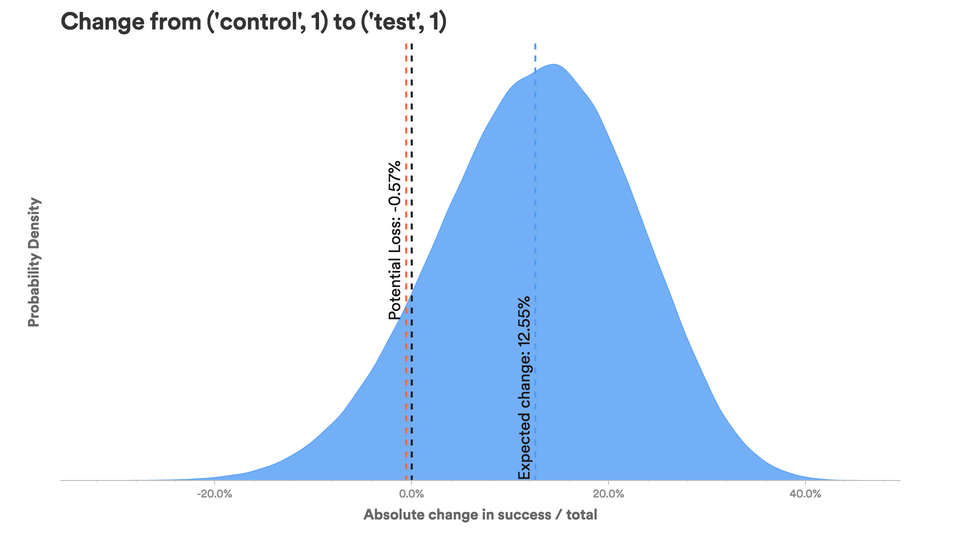

In [33]:
test.difference_plot(('control', 1), ('test', 1)).show('png')

## Ordinal + 2 categorical

In [34]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',],
                   'success': [500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,
                               500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,],
                   'total': [2010, 42, 250,
                             2000, 40, 253,
                             2030, 43, 254,
                             2000, 40, 250,
                             2040, 41, 255,
                             1010, 22, 150,
                             1000, 20, 153,
                             1030, 23, 154,
                             1000, 20, 150,
                             1040, 21, 155,],
                   'days_since_reg': [1, 1, 1,
                                      2, 2, 2,
                                      3, 3, 3,
                                      4, 4, 4,
                                      5, 5, 5,
                                      1, 1, 1,
                                      2, 2, 2,
                                      3, 3, 3,
                                      4, 4, 4,
                                      5, 5, 5],
                   'country': ['us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us', 'us',
                               'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb', 'gb',]})
df.head()

country  days_since_reg  success  total variation_name
0      us               1      500   2010           test
1      us               1        8     42        control
2      us               1      100    250          test2
3      us               2      510   2000           test
4      us               2        8     40        control

In [35]:
test = confidence.BetaBinomial(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns=['variation_name', 'country'],
                               ordinal_group_column='days_since_reg')

In [36]:
test.summary()

variation_name country  days_since_reg  success  total  probability  \
0            test      us               1      500   2010     0.248756   
1         control      us               1        8     42     0.190476   
2           test2      us               1      100    250     0.400000   
3            test      us               2      510   2000     0.255000   
4         control      us               2        8     40     0.200000   
5           test2      us               2      100    253     0.395257   
6            test      us               3      520   2030     0.256158   
7         control      us               3        9     43     0.209302   
8           test2      us               3      104    254     0.409449   
9            test      us               4      530   2000     0.265000   
10        control      us               4        7     40     0.175000   
11          test2      us               4      100    250     0.400000   
12           test      us               5      530   2040     0.259804   
13        control      us               5        8     41     0.195122   
14          test2      us               5      103    255     0.403922   
15           test      gb               1      500   1010     0.495050   
16        control      gb               1        8     22     0.363636   
17          test2      gb               1      100    150     0.666667   
18           test      gb               2      510   1000     0.510000   
19        control      gb               2        8     20     0.400000   
20          test2      gb               2      100    153     0.653595   
21           test      gb               3      520   1030     0.504854   
22        control      gb               3        9     23     0.391304   
23          test2      gb               3      104    154     0.675325   
24           test      gb               4      530   1000     0.530000   
25        control      gb               4        7     20     0.350000   
26          test2      gb               4      100    150     0.666667   
27           test      gb               5      530   1040     0.509615   
28        control      gb               5        8     21     0.380952   
29          test2      gb               5      103    155     0.664516   

    probability_ci_lower  probability_ci_upper  
0               0.230229              0.268007  
1               0.094403              0.327494  
2               0.340709              0.461591  
3               0.236262              0.274447  
4               0.099374              0.342221  
5               0.336483              0.456412  
6               0.237526              0.275484  
7               0.108929              0.347289  
8               0.350283              0.470665  
9               0.246008              0.284672  
10              0.081854              0.313172  
11              0.340709              0.461591  
12              0.241124              0.279165  
13              0.096824              0.334697  
14              0.345059              0.464952  
15              0.464266              0.525861  
16              0.189323              0.571290  
17              0.588610              0.738361  
18              0.479025              0.540917  
19              0.210629              0.616080  
20              0.575883              0.725557  
21              0.474343              0.535339  
22              0.214311              0.593805  
23              0.598643              0.745486  
24              0.499017              0.560810  
25              0.172276              0.567766  
26              0.588610              0.738361  
27              0.479242              0.539936  
28              0.199402              0.592895  
29              0.587684              0.735269

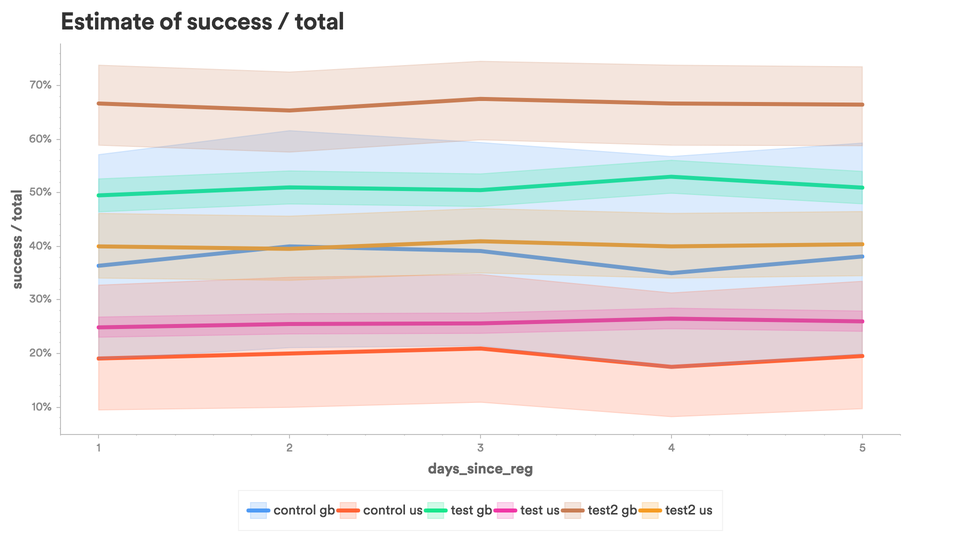

In [37]:
test.summary_plot().show('png')

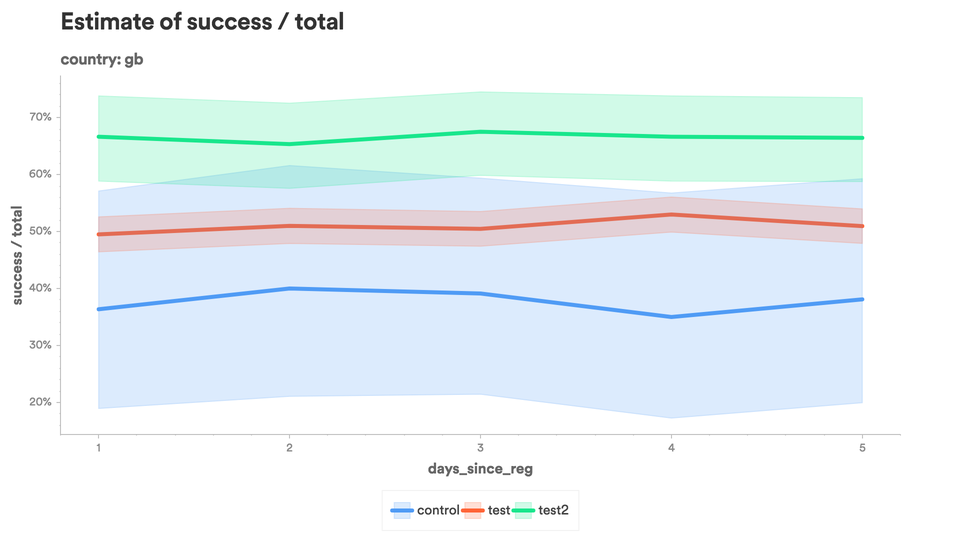

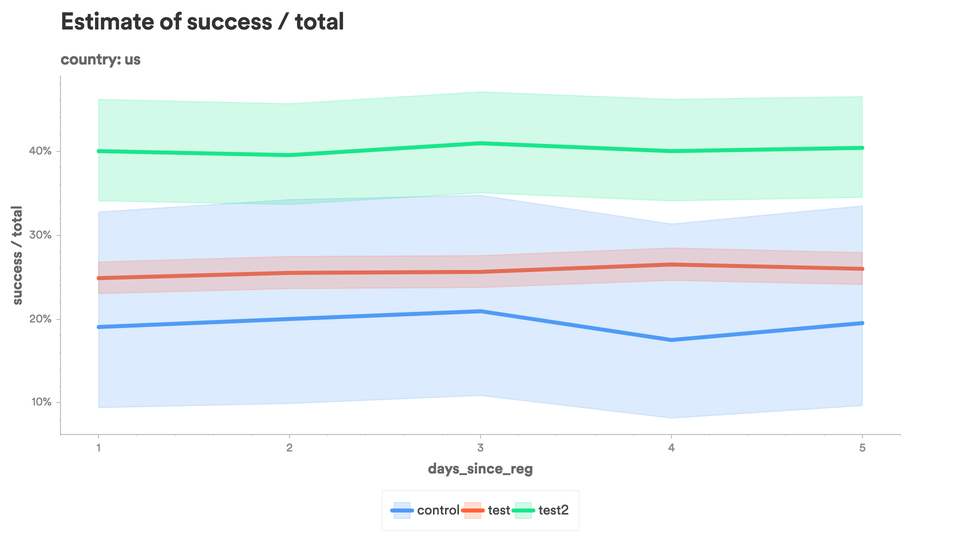

In [38]:
test.summary_plot(groupby='country').show('png')

# Frequentist

## Single categorical

In [39]:
df = pd.DataFrame({'variation_name': ['test', 'test2', 'control',],
                   'success': [14, 40, 20],
                   'total': [100, 100, 100],
                   'other unused column': [1, 2, 2]})
df.head()

other unused column  success  total variation_name
0                    1       14    100           test
1                    2       40    100          test2
2                    2       20    100        control

In [40]:
test = confidence.ChiSquared(data_frame=df,
                             numerator_column='success',
                             denominator_column='total',
                             categorical_group_columns='variation_name',)

In [41]:
test.summary()

variation_name  success  total  probability  probability_ci_lower  \
0           test       14    100         0.14              0.071992   
1          test2       40    100         0.40              0.303982   
2        control       20    100         0.20              0.121601   

   probability_ci_upper  
0              0.208008  
1              0.496018  
2              0.278399

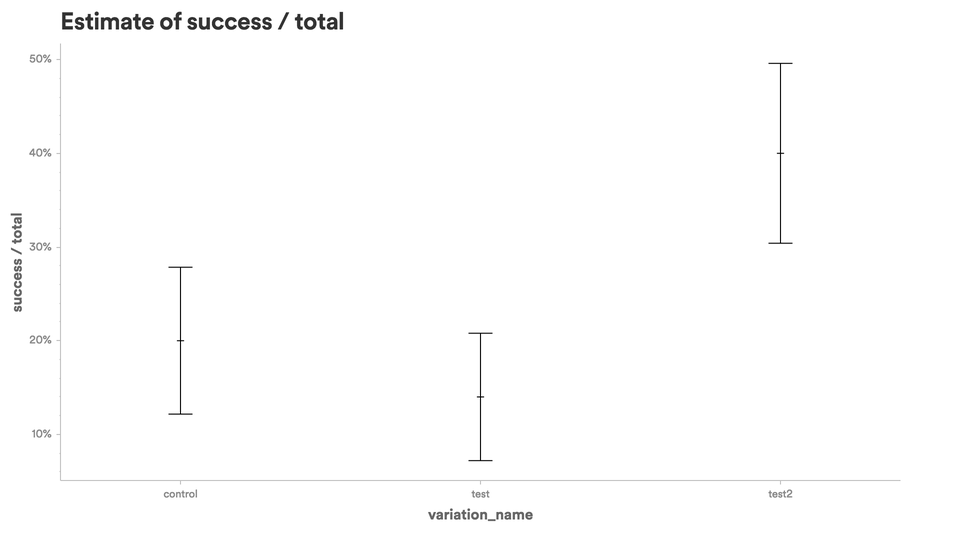

In [42]:
test.summary_plot().show('png')

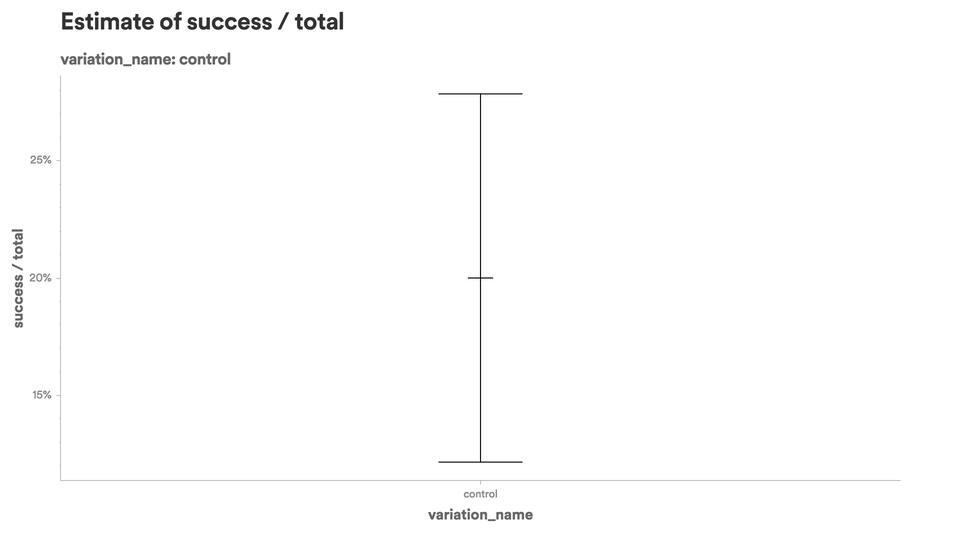

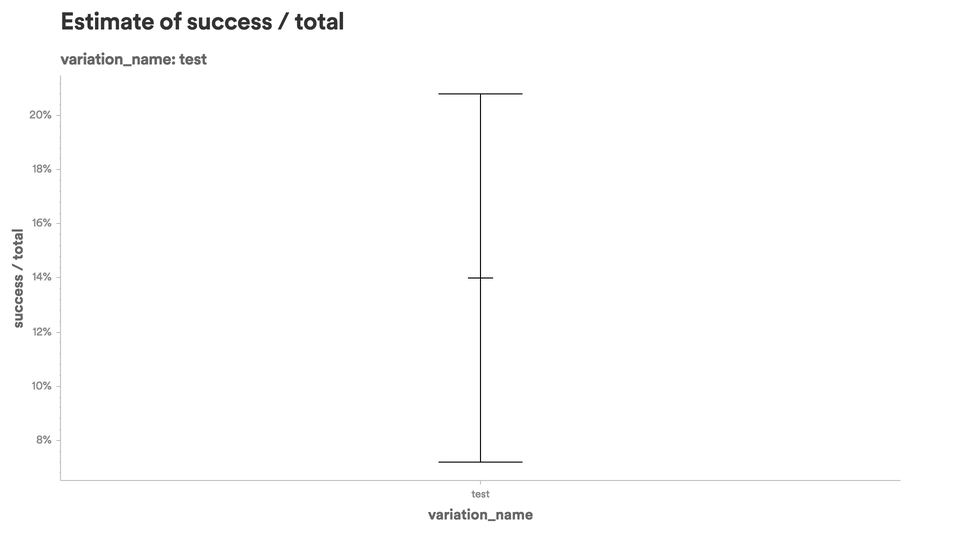

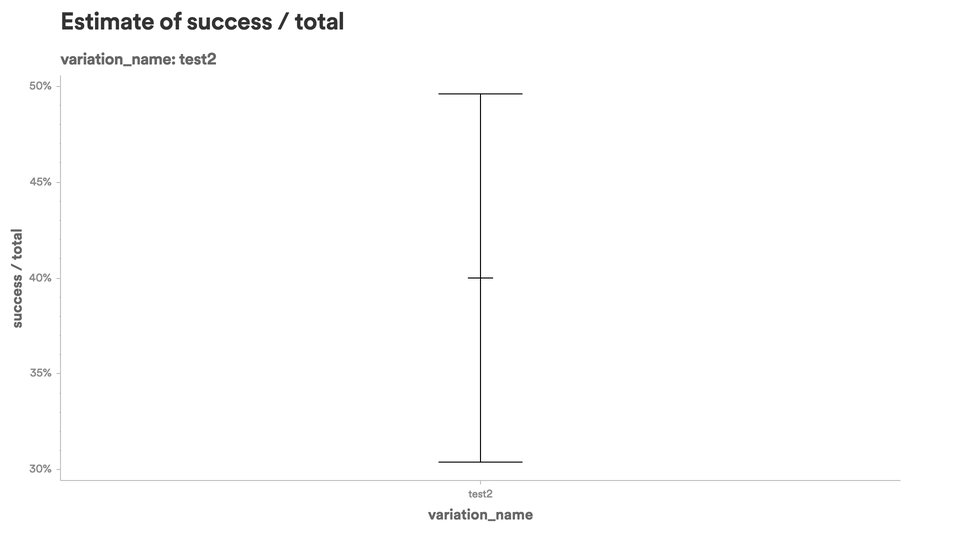

In [43]:
test.summary_plot(groupby='variation_name').show('png')

In [44]:
test.difference('control', 'test')

level_1 level_2  absolute_difference  difference  ci_lower  ci_upper  \
0  control    test                 True       -0.06 -0.163786  0.043786   

    p-value  
0  0.258702

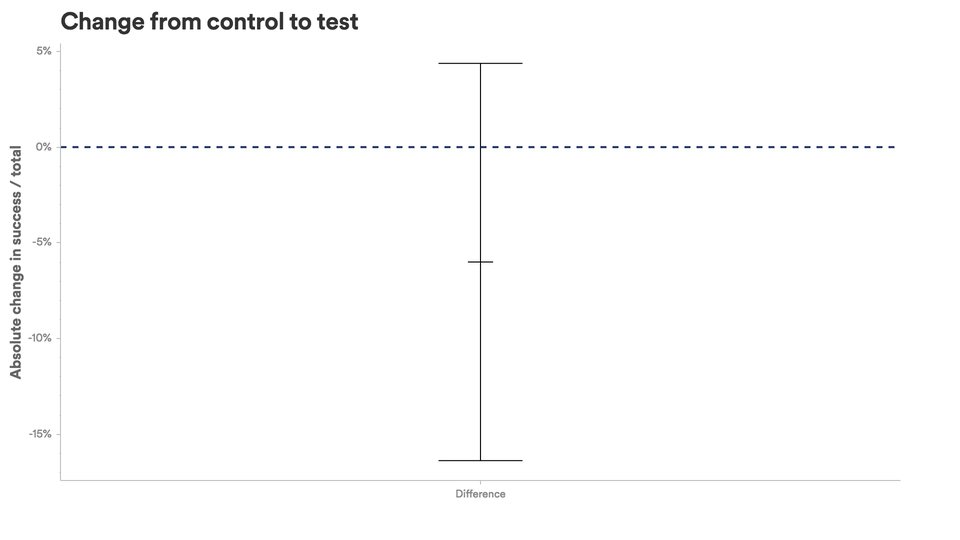

In [45]:
test.difference_plot('control', 'test').show('png')

In [46]:
test.multiple_difference('test')

level_1 level_2  absolute_difference  difference  ci_lower  ci_upper  \
0  control    test                 True       -0.06 -0.163786  0.043786   
1    test2    test                 True       -0.26 -0.377663 -0.142337   

    p-value  adjusted ci_lower  adjusted ci_upper  adjusted p-value  
0  0.258702          -0.178689           0.058689          0.517404  
1  0.000035          -0.394559          -0.125441          0.000069

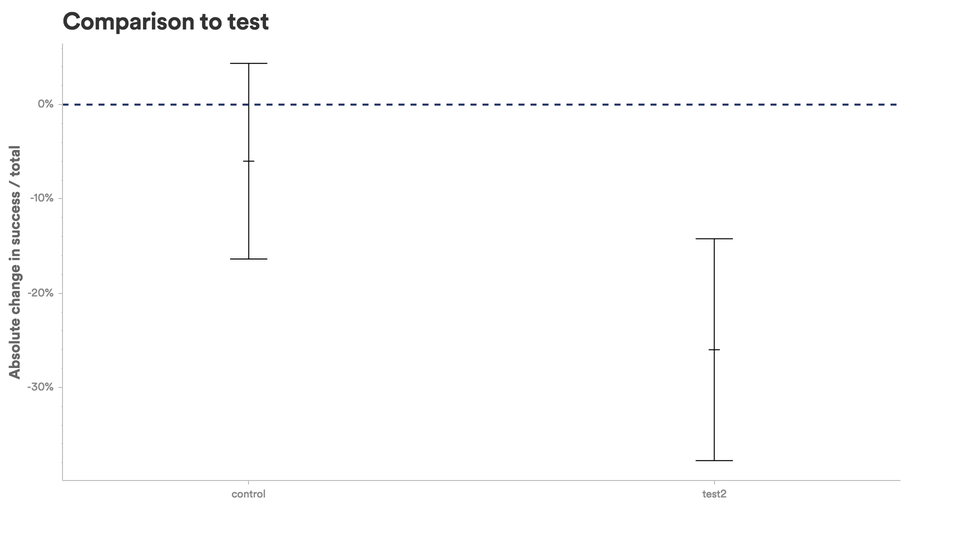

In [47]:
test.multiple_difference_plot('test').show('png')

## Multi categorical

In [48]:
df = pd.DataFrame({'variation_name': ['test', 'test', 'control', 'control', 'test2', 'test2', 'test3', 'test3'],
                   'success': [50, 60, 40, 140, 10, 20, 20, 20],
                   'total': [100, 100, 100, 200, 50, 50, 60, 60],
                   'country': ['us', 'ca', 'us', 'ca', 'us', 'ca', 'us', 'ca']})
df.head()

country  success  total variation_name
0      us       50    100           test
1      ca       60    100           test
2      us       40    100        control
3      ca      140    200        control
4      us       10     50          test2

In [49]:
test = confidence.ChiSquared(data_frame=df,
                             numerator_column='success',
                             denominator_column='total',
                             categorical_group_columns=['variation_name', 'country'],)

In [50]:
test.summary()

variation_name country  success  total  probability  probability_ci_lower  \
0           test      us       50    100     0.500000              0.402002   
1           test      ca       60    100     0.600000              0.503982   
2        control      us       40    100     0.400000              0.303982   
3        control      ca      140    200     0.700000              0.636490   
4          test2      us       10     50     0.200000              0.089128   
5          test2      ca       20     50     0.400000              0.264210   
6          test3      us       20     60     0.333333              0.214054   
7          test3      ca       20     60     0.333333              0.214054   

   probability_ci_upper  
0              0.597998  
1              0.696018  
2              0.496018  
3              0.763510  
4              0.310872  
5              0.535790  
6              0.452613  
7              0.452613

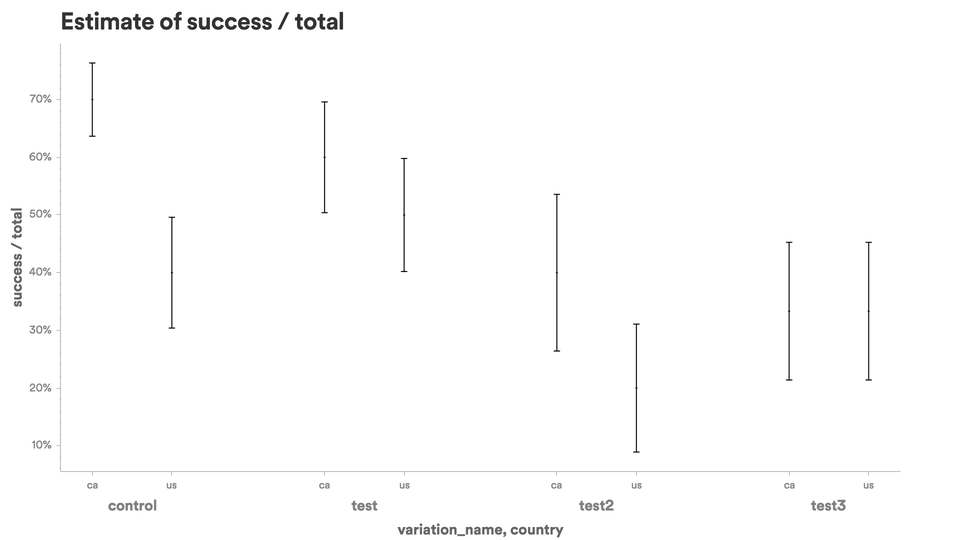

In [51]:
test.summary_plot().show('png')

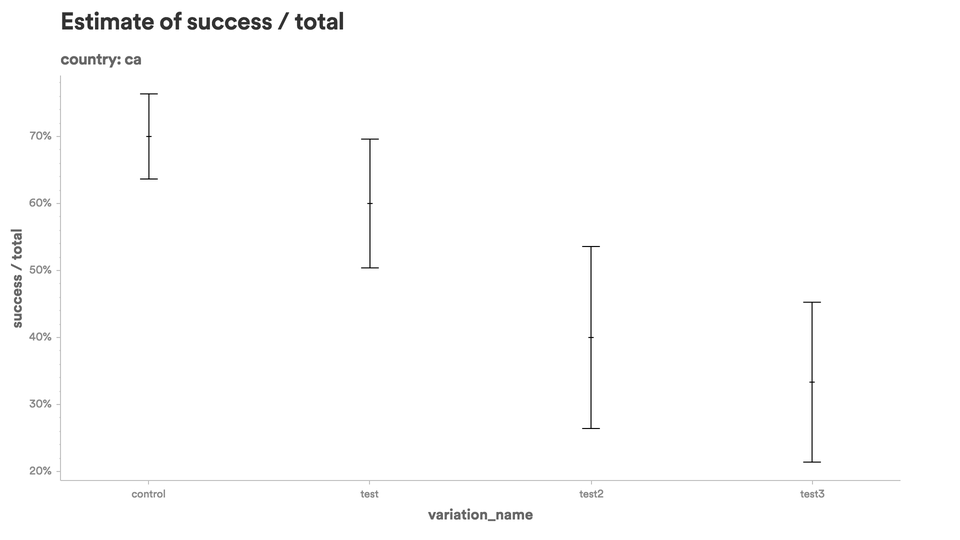

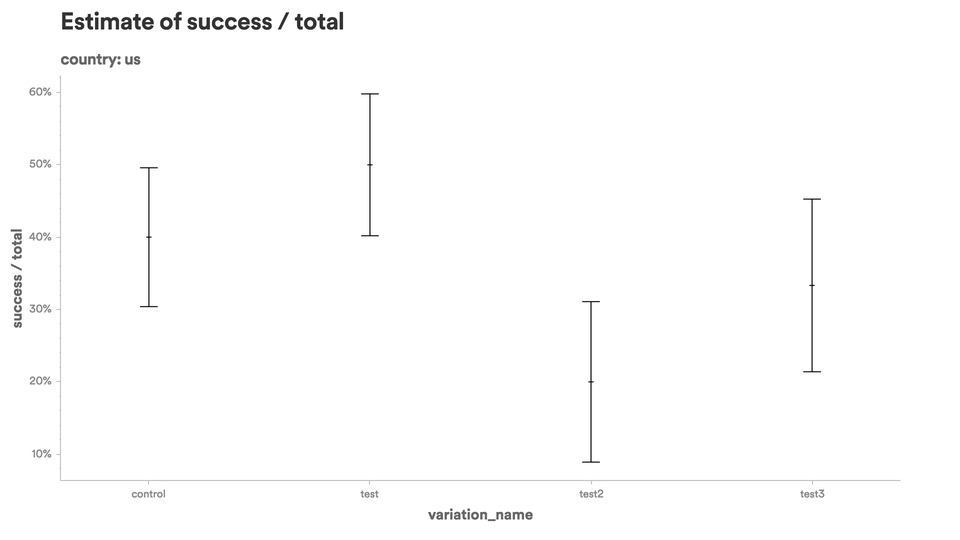

In [52]:
test.summary_plot(groupby='country').show('png')

In [53]:
test.difference(('control', 'us'), ('test', 'us'))

level_1         level_2  absolute_difference  difference  \
0  ('control', 'us')  ('test', 'us')                 True         0.1   

   ci_lower  ci_upper   p-value  
0 -0.037197  0.237197  0.155218

In [54]:
test.difference('control', 'test', groupby='country')

groupby  level_1 level_2  absolute_difference  difference  ci_lower  \
0      ca  control    test                 True        -0.1 -0.215122   
1      us  control    test                 True         0.1 -0.037197   

   ci_upper   p-value  
0  0.015122  0.083265  
1  0.237197  0.155218

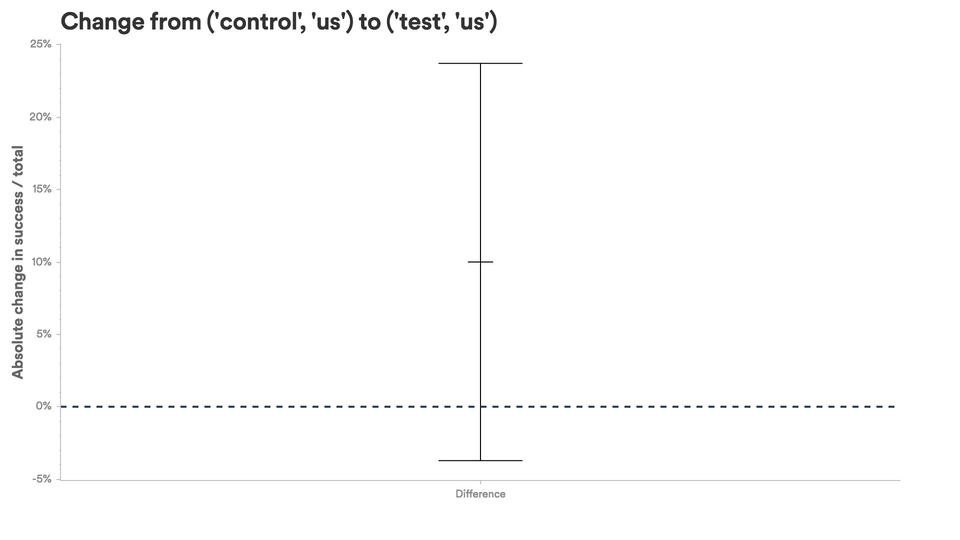

In [55]:
test.difference_plot(('control', 'us'), ('test', 'us')).show('png')

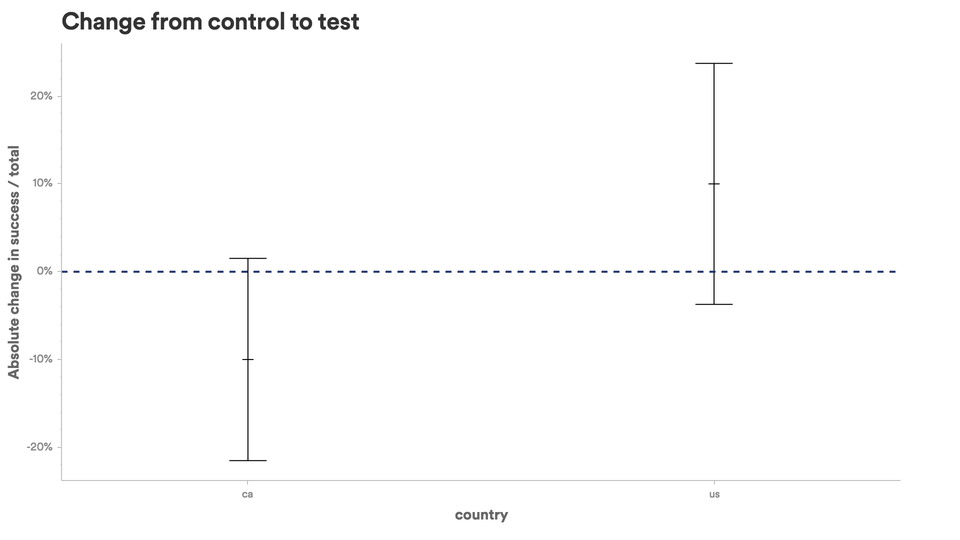

In [56]:
test.difference_plot('control', 'test', groupby='country').show('png')

In [57]:
test.multiple_difference('control', groupby='country')

groupby level_1  level_2  absolute_difference  difference  ci_lower  \
0      ca    test  control                 True    0.100000 -0.015122   
1      ca   test2  control                 True    0.300000  0.150092   
2      ca   test3  control                 True    0.366667  0.231533   
3      us    test  control                 True   -0.100000 -0.237197   
4      us   test2  control                 True    0.200000  0.053330   
5      us   test3  control                 True    0.066667 -0.086458   

   ci_upper       p-value  adjusted ci_lower  adjusted ci_upper  \
0  0.215122  8.326452e-02          -0.054963           0.254963   
1  0.449908  7.722680e-05           0.098212           0.501788   
2  0.501801  3.051772e-07           0.184766           0.548567   
3  0.037197  1.552185e-01          -0.284678           0.084678   
4  0.346670  1.430588e-02           0.002571           0.397429   
5  0.219791  3.990752e-01          -0.139450           0.272784   

   adjusted p-value  
0          0.499587  
1          0.000463  
2          0.000002  
3          0.931311  
4          0.085835  
5          2.394451

In [58]:
test.multiple_difference_plot(('control', 'us')).show()

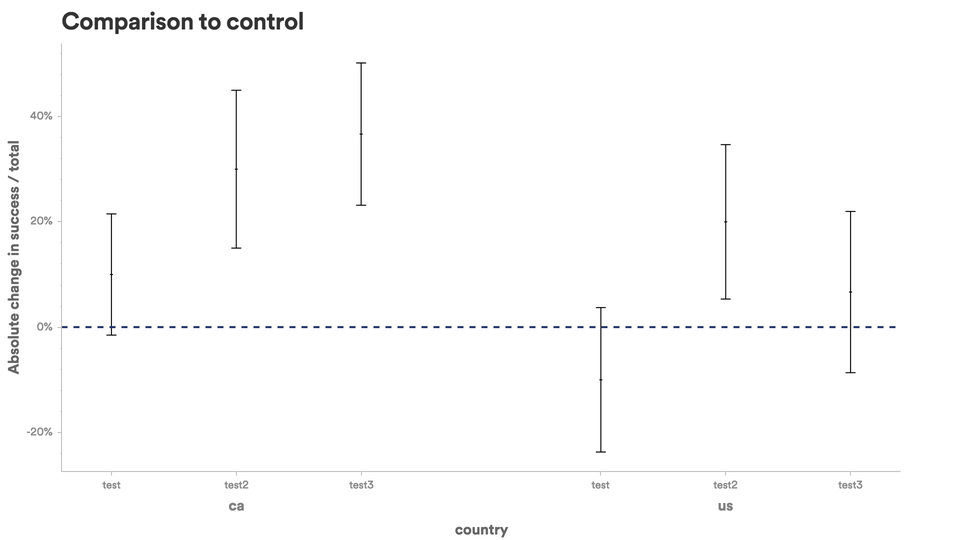

In [59]:
test.multiple_difference_plot('control', groupby='country').show('png')

# Ordinal + Categorical

In [60]:
df = pd.DataFrame({'variation_name': ['test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',
                                      'test','control', 'test2',],
                   'success': [500, 8, 100,
                               510, 8, 100,
                               520, 9, 104,
                               530, 7, 100,
                               530, 8, 103,],
                   'total': [1010, 22, 150,
                             1000, 20, 153,
                             1030, 23, 154,
                             1000, 20, 150,
                             1040, 21, 155,],
                   'date': ['2018-01-01', '2018-01-01', '2018-01-01',
                            '2018-01-02', '2018-01-02', '2018-01-02',
                            '2018-01-03', '2018-01-03', '2018-01-03',
                            '2018-01-04', '2018-01-04', '2018-01-04', 
                            '2018-01-05', '2018-01-05', '2018-01-05',]})

In [61]:
df['date'] = pd.to_datetime(df['date'])

In [62]:
test = confidence.ChiSquared(data_frame=df,
                               numerator_column='success',
                               denominator_column='total',
                               categorical_group_columns='variation_name',
                               ordinal_group_column='date')

In [63]:
test.summary()

variation_name       date  success  total  probability  \
0            test 2018-01-01      500   1010     0.495050   
1         control 2018-01-01        8     22     0.363636   
2           test2 2018-01-01      100    150     0.666667   
3            test 2018-01-02      510   1000     0.510000   
4         control 2018-01-02        8     20     0.400000   
5           test2 2018-01-02      100    153     0.653595   
6            test 2018-01-03      520   1030     0.504854   
7         control 2018-01-03        9     23     0.391304   
8           test2 2018-01-03      104    154     0.675325   
9            test 2018-01-04      530   1000     0.530000   
10        control 2018-01-04        7     20     0.350000   
11          test2 2018-01-04      100    150     0.666667   
12           test 2018-01-05      530   1040     0.509615   
13        control 2018-01-05        8     21     0.380952   
14          test2 2018-01-05      103    155     0.664516   

    probability_ci_lower  probability_ci_upper  
0               0.464215              0.525884  
1               0.162624              0.564649  
2               0.591228              0.742106  
3               0.479016              0.540984  
4               0.185297              0.614703  
5               0.578199              0.728991  
6               0.474321              0.535388  
7               0.191851              0.590758  
8               0.601369              0.749280  
9               0.499066              0.560934  
10              0.140963              0.559037  
11              0.591228              0.742106  
12              0.479233              0.539998  
13              0.173253              0.588652  
14              0.590185              0.738847

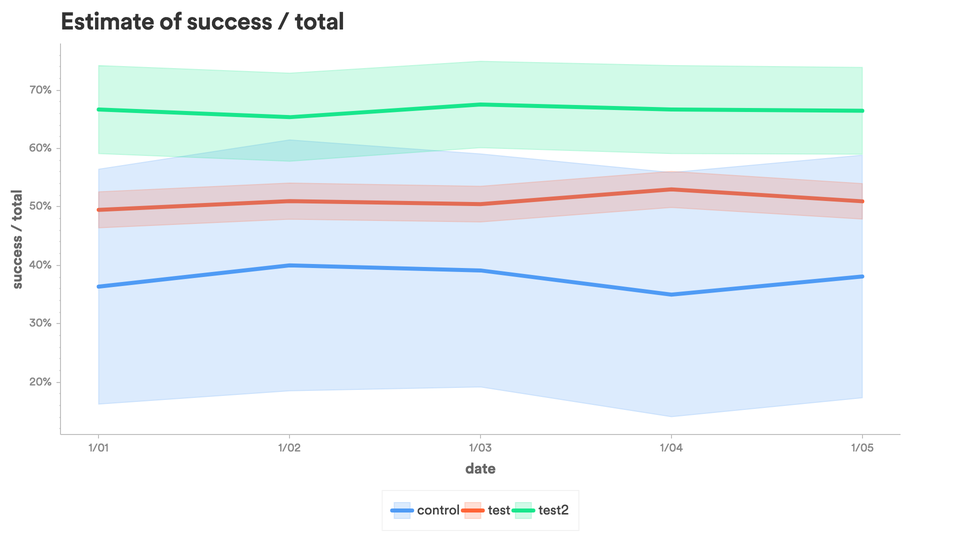

In [64]:
test.summary_plot().show('png')